Nama    : Jennifer Ardelia Limicia\
NIM     : 2602105090\
Kelas   : LB09\
Dataset D (Perempuan Genap)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [79]:
df = pd.read_csv("data_D.csv")
df

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,41254,105680,15671769,Nkemdirim,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,41255,70760,15570299,Martin,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,41256,3091,15807593,Tseng,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,41257,20130,15583460,Nwankwo,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


# Check Null Value dan Data Type

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [81]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

karena missing valuenya sangat sedikit, maka di drop saja

In [82]:
df.dropna(inplace=True)

# Drop column

Column-column yang di drop adalah column-column yang berupa ID dan nama karena tidak akan berpengaruh pada prediksi nantinya. Apabila disertakan dalam modelling nanti, takutnya akan merusak model.

In [83]:
df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...
41254,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


# Check unique value

In [84]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    elif "int" in str(df[col].dtype) or "float" in str(df[col].dtype):
        num.append(col)
        
print(cat)
print(num)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'churn']


In [85]:
cat.extend(['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn'])

for i in ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn']:
    num.remove(i)

print(cat)
print(num)

['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn']
['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [86]:
for col in cat:
  print('------' + col.upper() + '------')
  print(df[col].value_counts())
  print()

------GEOGRAPHY------
Geography
France     23513
Spain       9080
Germany     8658
Name: count, dtype: int64

------GENDER------
Gender
Male      23163
Female    18088
Name: count, dtype: int64

------TENURE------
Tenure
2     4588
4     4439
7     4431
5     4291
3     4231
8     4231
1     4177
9     4171
6     3969
10    1474
0     1249
Name: count, dtype: int64

------NUMOFPRODUCTS------
NumOfProducts
2    21129
1    19311
3      694
4      117
Name: count, dtype: int64

------HASCRCARD------
HasCrCard
1    31119
0    10132
Name: count, dtype: int64

------ISACTIVEMEMBER------
IsActiveMember
0    20763
1    20488
Name: count, dtype: int64

------CHURN------
churn
0    32536
1     8715
Name: count, dtype: int64



# Check Outlier

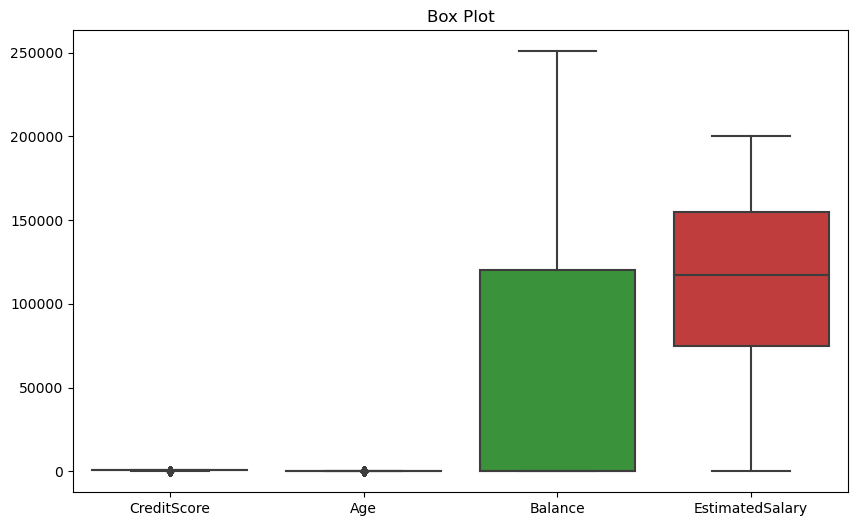

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num])
plt.title('Box Plot')
plt.show()

# Check Correlation

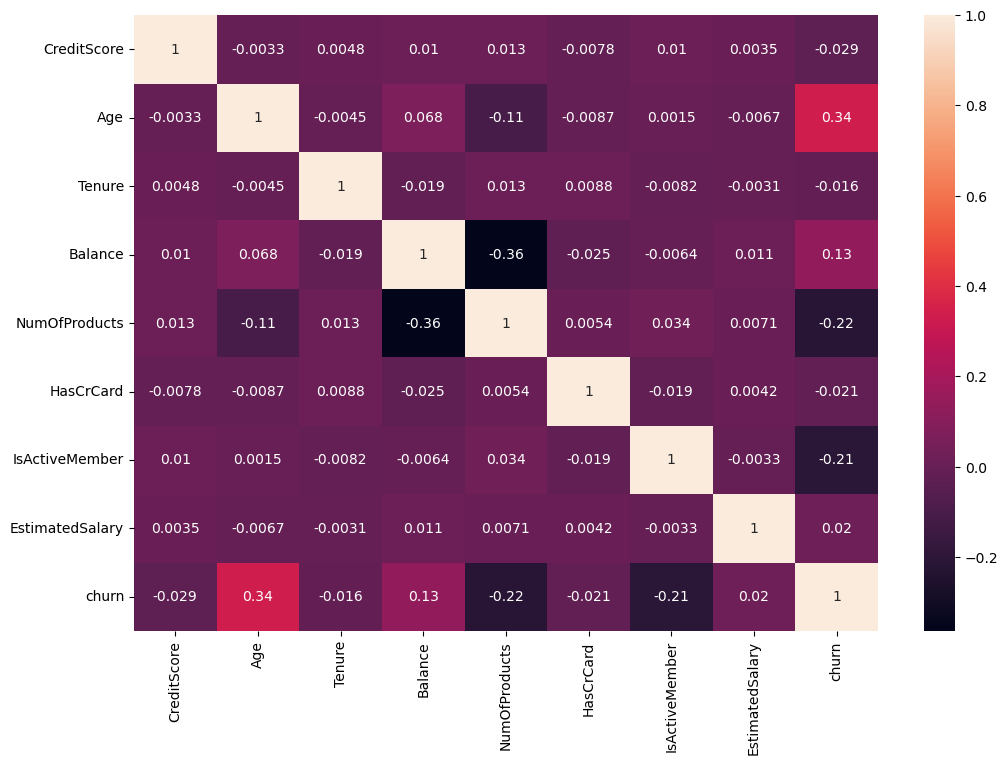

In [88]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
plt.show()

# Split Data

In [89]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...
41254,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


In [90]:
x = df.drop(['churn'], axis=1)
y = df['churn']

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(33000, 10) (33000,)
(8251, 10) (8251,)


# Encode

In [92]:
from sklearn.preprocessing import OneHotEncoder

OHE_encode = ['Geography', 'Gender']

for col in OHE_encode:
  encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
  # Fit and transform the 'Gender' column for each DataFrame
  encoded_train = encoder.fit_transform(x_train[[col]])
  encoded_test = encoder.transform(x_test[[col]])

  columns_to_drop = [col]

  # Reset indices before concatenation
  x_train = x_train.reset_index(drop=True)
  x_test = x_test.reset_index(drop=True)
  x_train = pd.concat([x_train.drop(columns=columns_to_drop), pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)
  x_test = pd.concat([x_test.drop(columns=columns_to_drop), pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)

c:\Users\jenni\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\jenni\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,691.0,43.0,2,0.00,2,1,1,131284.92,1.0,0.0,0.0,0.0,1.0
1,750.0,55.0,7,133871.19,1,1,0,53949.71,0.0,1.0,0.0,1.0,0.0
2,709.0,52.0,7,161889.79,1,0,1,18761.92,1.0,0.0,0.0,1.0,0.0
3,749.0,38.0,7,0.00,2,1,1,149474.69,1.0,0.0,0.0,0.0,1.0
4,512.0,42.0,6,117436.36,1,1,0,155047.73,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,709.0,30.0,1,102050.47,1,1,0,82662.73,1.0,0.0,0.0,1.0,0.0
32996,750.0,39.0,8,134766.85,1,1,0,121789.30,0.0,0.0,1.0,1.0,0.0
32997,651.0,36.0,1,151809.66,2,1,0,111442.06,1.0,0.0,0.0,1.0,0.0
32998,587.0,35.0,7,0.00,3,1,1,53387.90,1.0,0.0,0.0,0.0,1.0


In [95]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,599.0,56.0,6,102773.20,1,1,1,37266.43,0.0,1.0,0.0,1.0,0.0
1,828.0,36.0,1,122793.96,2,1,0,99341.87,0.0,0.0,1.0,1.0,0.0
2,684.0,26.0,5,87098.91,1,0,0,106095.82,0.0,1.0,0.0,0.0,1.0
3,520.0,28.0,1,121197.64,1,1,1,72577.33,1.0,0.0,0.0,1.0,0.0
4,637.0,37.0,7,126477.43,1,0,0,70954.87,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,571.0,34.0,5,0.00,2,1,1,97614.03,0.0,0.0,1.0,1.0,0.0
8247,624.0,35.0,8,122922.58,1,1,0,107499.27,0.0,0.0,1.0,0.0,1.0
8248,707.0,46.0,1,120811.89,1,1,0,185510.34,0.0,1.0,0.0,1.0,0.0
8249,573.0,37.0,2,0.00,2,0,1,126761.20,1.0,0.0,0.0,1.0,0.0


# Scaling

In [96]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [97]:
from sklearn.preprocessing import  RobustScaler

continous = ['CreditScore', 'Balance', 'EstimatedSalary']

for col in continous:
  scaler = RobustScaler()
  x_train_scaled[col] = scaler.fit_transform(x_train_scaled[col].values.reshape(-1, 1))
  x_test_scaled[col] = scaler.transform(x_test_scaled[col].values.reshape(-1, 1))

In [98]:
x_train_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.285714,43.0,2,0.000000,2,1,1,0.168111,1.0,0.0,0.0,0.0,1.0
1,0.812500,55.0,7,1.110097,1,1,0,-0.798186,0.0,1.0,0.0,1.0,0.0
2,0.446429,52.0,7,1.342435,1,0,1,-1.237854,1.0,0.0,0.0,1.0,0.0
3,0.803571,38.0,7,0.000000,2,1,1,0.395391,1.0,0.0,0.0,0.0,1.0
4,-1.312500,42.0,6,0.973815,1,1,0,0.465025,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,0.446429,30.0,1,0.846231,1,1,0,-0.439419,1.0,0.0,0.0,1.0,0.0
32996,0.812500,39.0,8,1.117524,1,1,0,0.049464,0.0,0.0,1.0,1.0,0.0
32997,-0.071429,36.0,1,1.258848,2,1,0,-0.079824,1.0,0.0,0.0,1.0,0.0
32998,-0.642857,35.0,7,0.000000,3,1,1,-0.805206,1.0,0.0,0.0,0.0,1.0


In [99]:
x_test_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.535714,56.0,6,0.852224,1,1,1,-1.006642,0.0,1.0,0.0,1.0,0.0
1,1.508929,36.0,1,1.018241,2,1,0,-0.231015,0.0,0.0,1.0,1.0,0.0
2,0.223214,26.0,5,0.722248,1,0,0,-0.146625,0.0,1.0,0.0,0.0,1.0
3,-1.241071,28.0,1,1.005004,1,1,1,-0.565435,1.0,0.0,0.0,1.0,0.0
4,-0.196429,37.0,7,1.048786,1,0,0,-0.585708,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,-0.785714,34.0,5,0.000000,2,1,1,-0.252604,0.0,0.0,1.0,1.0,0.0
8247,-0.312500,35.0,8,1.019308,1,1,0,-0.129089,0.0,0.0,1.0,0.0,1.0
8248,0.428571,46.0,1,1.001806,1,1,0,0.845653,0.0,1.0,0.0,1.0,0.0
8249,-0.767857,37.0,2,0.000000,2,0,1,0.111587,1.0,0.0,0.0,1.0,0.0


# Modelling

In [100]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Random Forest

### Model 1

#### Unscaled

In [102]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf1.fit(x_train, y_train)

In [103]:
rf1_pred = rf1.predict(x_test)
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6519
           1       0.74      0.50      0.60      1732

    accuracy                           0.86      8251
   macro avg       0.81      0.73      0.75      8251
weighted avg       0.85      0.86      0.85      8251



In [107]:
accuracy = accuracy_score(y_test, rf1_pred)
precision = precision_score(y_test, rf1_pred, average='weighted')
recall = recall_score(y_test, rf1_pred, average='weighted')
f1 = f1_score(y_test, rf1_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8583202036116835
Precision = 0.8489933270839446
Recall = 0.8583202036116835
F1 Score = 0.847261882163499
